**<h2>Analisis Data bike-sharing-dataset Pecatu Bicycle**

<ul>
<li>Nama = Salsa Julia Jasmine
<li>Email = m009b4kx4029@bangkit.academy
<li>ID Dicoding = salsajuliajasmine

<h2>Pertanyaan Bisnis :

1. Bulan apa yang mencatatkan jumlah penyewaan sepeda tertinggi dan terendah? Strategi apa yang dapat diterapkan untuk meningkatkan penyewaan di bulan-bulan dengan permintaan rendah?  

2. Bagaimana pola penyewaan sepeda berubah dari tahun ke tahun? Apakah bisnis menunjukkan tanda-tanda pertumbuhan?  

3. Apakah hari libur dan akhir pekan secara signifikan memengaruhi jumlah penyewaan sepeda jika dibandingkan dengan hari kerja?  

4. Bagaimana pengaruh musim terhadap tingkat penyewaan sepeda? Musim apa yang mencatatkan jumlah pengguna sepeda terbanyak?  


**<h2>Import Library**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd



In [2]:
# Mengelola memori dengan membersihkan objek yang tidak digunakan
import gc
gc.collect()

0

**<h2>Data Understanding</h2>**

In [3]:
# Membaca data dari file CSV dan menampilkan beberapa baris pertama
day = pd.read_csv(r"day.csv")
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
day.shape

(731, 16)

In [5]:
day.nunique()

,0
instant,731
dteday,731
season,4
yr,2
mnth,12
holiday,2
weekday,7
workingday,2
weathersit,3
temp,499


In [6]:
hour = pd.read_csv(r"hour.csv")  #membuat dataframe dari dataset hour.csv
hour.head(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [7]:
hour.shape

(17379, 17)

In [8]:
hour.nunique()

,0
instant,17379
dteday,731
season,4
yr,2
mnth,12
hr,24
holiday,2
weekday,7
workingday,2
weathersit,4


In [9]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [10]:
hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


**Insight:**

Dataset ini berisi beberapa kolom penting yang menjelaskan informasi terkait penyewaan sepeda. Kolom **instant** merupakan nomor urut sampel, sedangkan **dteday** mencatat tanggal laporan harian perusahaan. Kolom **season** merepresentasikan musim saat pelanggan menyewa sepeda, dengan angka 1 untuk musim dingin hingga 4 untuk musim gugur. **yr** menunjukkan tahun penyewaan sepeda, dimulai sejak perusahaan berdiri, dan **mnth** merepresentasikan bulan dalam setahun (1–12). Kolom **holiday** mengindikasikan apakah hari tersebut merupakan hari libur, sementara **weekday** menggambarkan hari dalam seminggu dengan nilai 0 untuk Minggu hingga 6 untuk Sabtu.  

Kolom **workingday** menunjukkan apakah hari tersebut adalah hari kerja. Sementara itu, **weathersit** menggambarkan kondisi cuaca. **temp** adalah suhu pada hari itu yang telah dinormalisasi, dan **atemp** adalah suhu yang dirasakan. **hum** menunjukkan tingkat kelembapan dalam skala normalisasi, sedangkan **windspeed** mengukur kecepatan angin dalam skala yang sama.  

Dari segi pelanggan, **casual** mencatat jumlah penyewa sepeda yang tidak memiliki kartu anggota, sedangkan **registered** mencatat jumlah penyewa yang memiliki kartu anggota. Akhirnya, kolom **cnt** merepresentasikan total jumlah penyewa sepeda per hari untuk setiap sampel.

**<h2>Data Wrangling<h2>**

In [11]:
# Mengonversi kolom 'dteday' menjadi format datetime dan menampilkan informasi tentang dataset
day['dteday'] = pd.to_datetime(day['dteday'])
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [12]:
# Mengubah kolom 'dteday' pada dataset 'hour' menjadi format datetime dan menampilkan ringkasan informasi dataset
hour['dteday'] = pd.to_datetime(hour['dteday'])
hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [13]:
# Menghapus kolom 'instant' dan 'dteday', lalu menampilkan statistik deskriptif untuk kolom yang tersisa
day.drop(['instant', 'dteday'], axis=1).describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [14]:
# Menghapus kolom 'instant' dan 'dteday' dari dataset 'hour', lalu menampilkan statistik deskriptif untuk kolom lainnya
hour.drop(['instant', 'dteday'], axis=1).describe()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [15]:
# Menampilkan jumlah nilai null di setiap kolom dalam dataset 'day' dan 'hour'
print(day.isna().sum())
print(hour.isna().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


**Insight:**
Karena di dalam data ini tidak ada nilai NULL, berarti semua data sudah bersih dari nilai NULL.

In [16]:
# Menampilkan jumlah sampel duplikat dalam dataset 'day.csv' dan 'hour.csv'

print(f"Jumlah sampel duplikat di dataset day.csv = {day.duplicated().sum()}")
print(f"Jumlah sampel duplikat di dataset hour.csv = {hour.duplicated().sum()}")

Jumlah sampel duplikat di dataset day.csv = 0
Jumlah sampel duplikat di dataset hour.csv = 0


**Insight:**
Kedua dataset yang dipakai aman dari sampel duplikat

**<h2>Exploratory Data Analysis<h2>**


Pertama yaitu menampilkan histogram dari setiap kolom untuk melihat distribusi probabilitasnya

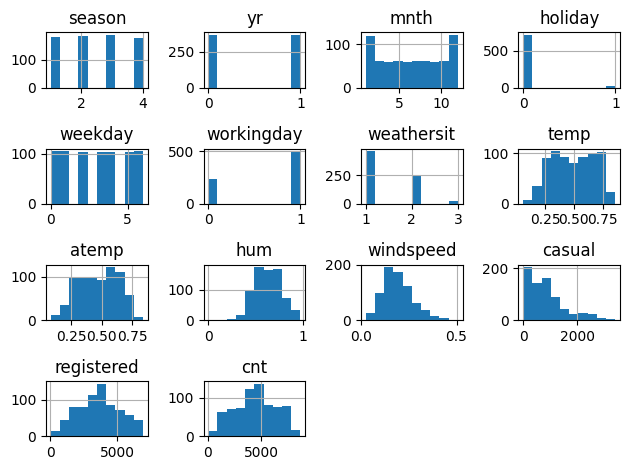

In [17]:
# Menghapus kolom 'instant' dan 'dteday' dari dataset 'day' karena keduanya memiliki nilai unik di setiap sampel
day.drop(columns=['instant', 'dteday']).hist()

# Menyesuaikan tata letak plot agar lebih rapi
plt.tight_layout()

Dari histogram yang ditampilkan, berikut adalah beberapa insight yang dapat diambil:

1. **Distribusi Kategorikal:**
   - **`season`, `yr`, `mnth`, `holiday`, `weekday`, `workingday`, `weathersit`:** Data pada kolom-kolom ini tampaknya merupakan data kategorikal dengan nilai-nilai diskrit. Contohnya:
     - `season` memiliki 4 kategori (kemungkinan besar 1: Musim Semi, 2: Musim Panas, dst.).
     - `yr` hanya memiliki dua kategori (0 dan 1), mungkin menunjukkan dua tahun yang berbeda.
     - `holiday` memiliki distribusi yang menunjukkan sebagian besar hari bukan hari libur (0).

2. **Distribusi Numerik:**
   - **`temp` dan `atemp`:** Suhu (`temp`) dan suhu yang dirasakan (`atemp`) memiliki distribusi yang hampir normal, tetapi agak miring ke kanan.
   - **`hum` (kelembapan):** Distribusi kelembapan terpusat di sekitar 0,6 hingga 0,8, menunjukkan sebagian besar hari memiliki kelembapan sedang hingga tinggi.
   - **`windspeed`:** Kecepatan angin memiliki distribusi yang cenderung miring ke kiri, dengan sebagian besar nilai berada di bawah 0,25.
   - **`casual` dan `registered`:**
     - Pengguna kasual (`casual`) memiliki distribusi yang condong ke kiri, menunjukkan sebagian besar hari memiliki jumlah pengguna kasual yang rendah.
     - Pengguna terdaftar (`registered`) memiliki distribusi yang lebih terpusat, menunjukkan jumlah pengguna terdaftar lebih konsisten.
   - **`cnt`:** Total pengguna (`cnt`) memiliki distribusi yang hampir normal, tetapi sedikit miring ke kanan.

3. **Kemungkinan Interpretasi:**
   - Pengguna kasual jauh lebih sedikit dibandingkan pengguna terdaftar.
   - Mayoritas hari dalam dataset adalah hari kerja biasa, bukan hari libur.
   - Suhu, kelembapan, dan kecepatan angin dapat memiliki hubungan dengan jumlah pengguna (dapat dianalisis lebih lanjut menggunakan analisis korelasi).

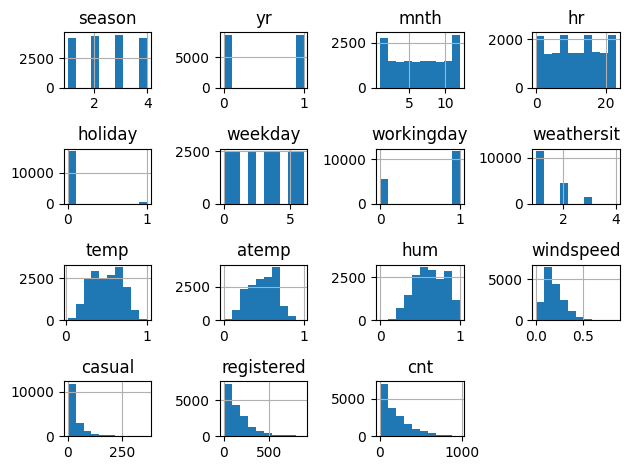

In [18]:
# Menghapus kolom 'instant' dan 'dteday' dari dataset 'hour' karena keduanya tidak relevan (memiliki nilai unik di setiap sampel)
hour.drop(['instant', 'dteday'], axis=1).hist()

# Menyesuaikan tata letak plot agar lebih rapi dan tidak saling tumpang tindih
plt.tight_layout()

Berdasarkan histogram pada output ini, berikut adalah beberapa insight yang dapat diambil:

1. **Distribusi Kategorikal:**
   - **`season`, `yr`, `mnth`, `hr`, `holiday`, `weekday`, `workingday`, `weathersit`:**
     - `season`: Data terbagi menjadi 4 kategori (kemungkinan 1: Musim Semi, 2: Musim Panas, dst.).
     - `yr`: Terdapat 2 kategori (0 dan 1), mungkin menunjukkan data untuk dua tahun berbeda.
     - `mnth`: Distribusi cukup merata di antara 12 bulan.
     - `hr`: Distribusi waktu (jam) menunjukkan beberapa waktu lebih populer daripada lainnya, misalnya puncak pada jam tertentu (mungkin jam sibuk seperti pagi atau sore).
     - `holiday`: Mayoritas data adalah hari kerja biasa (bukan hari libur).
     - `weekday`: Distribusi rata, menunjukkan tidak ada hari tertentu yang dominan.
     - `workingday`: Sebagian besar data berasal dari hari kerja.
     - `weathersit`: Sebagian besar cuaca berada di kategori 1 (cuaca cerah atau mendung ringan).

2. **Distribusi Numerik:**
   - **`temp` dan `atemp`:** Suhu (`temp`) dan suhu yang dirasakan (`atemp`) memiliki distribusi yang menyerupai normal, tetapi sedikit miring ke kanan.
   - **`hum` (kelembapan):** Sebagian besar data terpusat pada kelembapan sedang hingga tinggi (sekitar 0,6–0,8).
   - **`windspeed`:** Kecepatan angin mayoritas rendah (di bawah 0,25), menunjukkan sebagian besar hari tidak terlalu berangin.
   - **`casual` dan `registered`:**
     - Pengguna kasual (`casual`) memiliki distribusi yang sangat condong ke kiri, menunjukkan mayoritas waktu memiliki sedikit pengguna kasual.
     - Pengguna terdaftar (`registered`) lebih banyak dibandingkan pengguna kasual, dengan distribusi juga condong ke kiri tetapi lebih terpusat.
   - **`cnt`:** Total pengguna (`cnt`) memiliki distribusi mirip `registered`, menunjukkan dominasi pengguna terdaftar.

3. **Analisis Waktu (Jam):**
   - Variabel `hr` menunjukkan pola waktu tertentu lebih populer, yang mungkin berkaitan dengan jam sibuk (contoh: pagi dan sore hari ketika orang bepergian untuk bekerja).

**<h2>Pertanyaan Bisnis:<h2>**

1.Bulan apa yang mencatatkan jumlah penyewaan sepeda tertinggi dan terendah? Strategi apa yang dapat diterapkan untuk meningkatkan penyewaan di bulan-bulan dengan permintaan rendah?

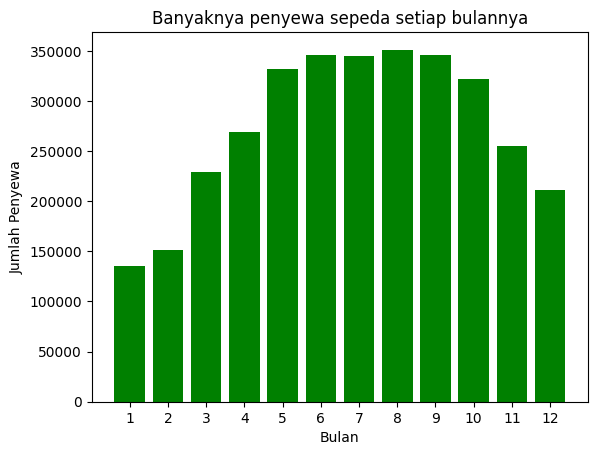

Bulan dengan penyewa sepeda terendah adalah bulan 1
Bulan dengan penyewa sepeda tertinggi adalah bulan 8


In [19]:
# Menghitung jumlah total penyewa sepeda per bulan, mengurutkan berdasarkan jumlah terbesar, dan mengambil 12 bulan teratas
jumlah_penyewa_perbulan = day.groupby('mnth')['cnt'].sum().reset_index().nlargest(n=12, columns='cnt')

# Membuat grafik batang vertikal dengan warna hijau untuk menunjukkan jumlah penyewa sepeda per bulan
plt.bar(
    x=jumlah_penyewa_perbulan['mnth'],
    height=jumlah_penyewa_perbulan['cnt'],
    color='green'
)
plt.xticks(range(1, 13))  # Menampilkan angka 1-12 sebagai label bulan
plt.title('Banyaknya penyewa sepeda setiap bulannya')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Penyewa')
plt.show()

# Menentukan bulan dengan jumlah penyewa sepeda terendah
penyewa_bulan_terendah = jumlah_penyewa_perbulan.sort_values(by='cnt', ascending=True).head(1)
print("Bulan dengan penyewa sepeda terendah adalah bulan {}".format(penyewa_bulan_terendah.iloc[0, 0]))

# Menentukan bulan dengan jumlah penyewa sepeda tertinggi
print("Bulan dengan penyewa sepeda tertinggi adalah bulan {}".format(jumlah_penyewa_perbulan.iloc[0, 0]))

2. Bagaimana pola penyewaan sepeda berubah dari tahun ke tahun? Apakah bisnis menunjukkan tanda-tanda pertumbuhan?

<ipython-input-20-b7ff20bcbcd3>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=jumlah_penyewa_per_tahun, x='yr', y='cnt', palette=['green', 'yellow'])


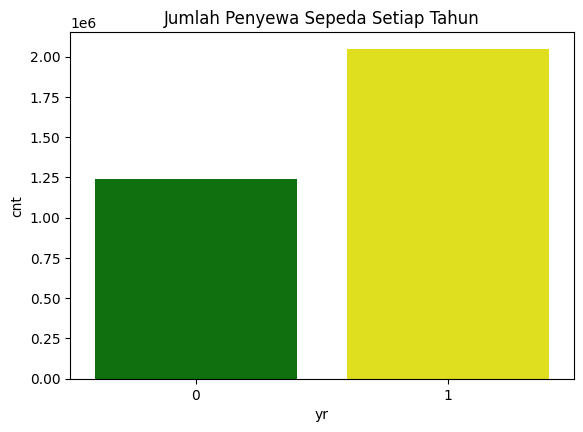

<ipython-input-20-b7ff20bcbcd3>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=rata2_penyewa_per_tahun, x='yr', y='cnt', palette=['green', 'yellow'])


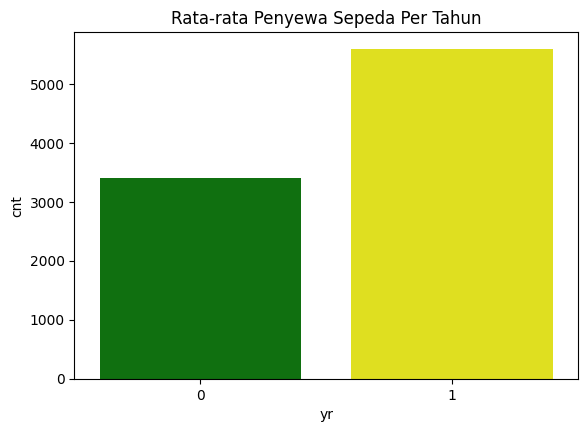

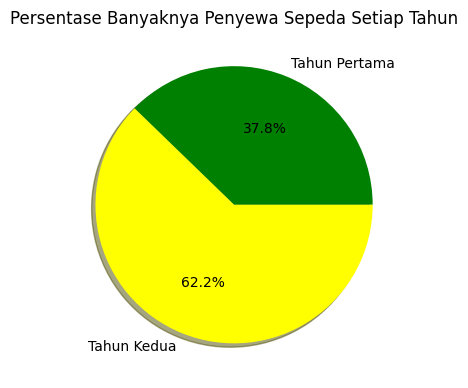

In [20]:
# Menghitung jumlah total penyewa sepeda per tahun
jumlah_penyewa_per_tahun = day.groupby(by='yr')['cnt'].sum().reset_index()

# Menghitung rata-rata penyewa sepeda per tahun
rata2_penyewa_per_tahun = ((day.groupby(by='yr')['cnt'].mean()).round(2)).reset_index()

# Membuat barplot untuk jumlah penyewa sepeda per tahun
plt.figure(figsize=(6.5, 4.5))
sns.barplot(data=jumlah_penyewa_per_tahun, x='yr', y='cnt', palette=['green', 'yellow'])
plt.title('Jumlah Penyewa Sepeda Setiap Tahun')
plt.show()

# Membuat barplot untuk rata-rata penyewa sepeda per tahun
plt.figure(figsize=(6.5, 4.5))
sns.barplot(data=rata2_penyewa_per_tahun, x='yr', y='cnt', palette=['green', 'yellow'])
plt.title('Rata-rata Penyewa Sepeda Per Tahun')
plt.show()

# Membuat pie chart untuk persentase jumlah penyewa sepeda setiap tahun
plt.figure(figsize=(6.5, 4.5))
plt.pie(
    x=jumlah_penyewa_per_tahun['cnt'],
    labels=['Tahun Pertama', 'Tahun Kedua'],
    autopct='%1.1f%%',
    shadow=True,
    colors=['green', 'yellow']
)
plt.title('Persentase Banyaknya Penyewa Sepeda Setiap Tahun')
plt.savefig('piechart_banyaknya_penyewa_sepeda_pertahun.png')
plt.show()

**Insight:**
Bar Chart bagian pertama pada nilai cnt merepresentasikan banyaknya penyewa sepeda dalam waktu 1 tahun (nilai dalam bentuk jutaan)

3. Apakah hari libur dan akhir pekan secara signifikan memengaruhi jumlah penyewaan sepeda jika dibandingkan dengan hari kerja?

Terdapat perbedaan signifikan antara jumlah penyewa di hari libur/pekan dengan jumlah penyewa di hari kerja


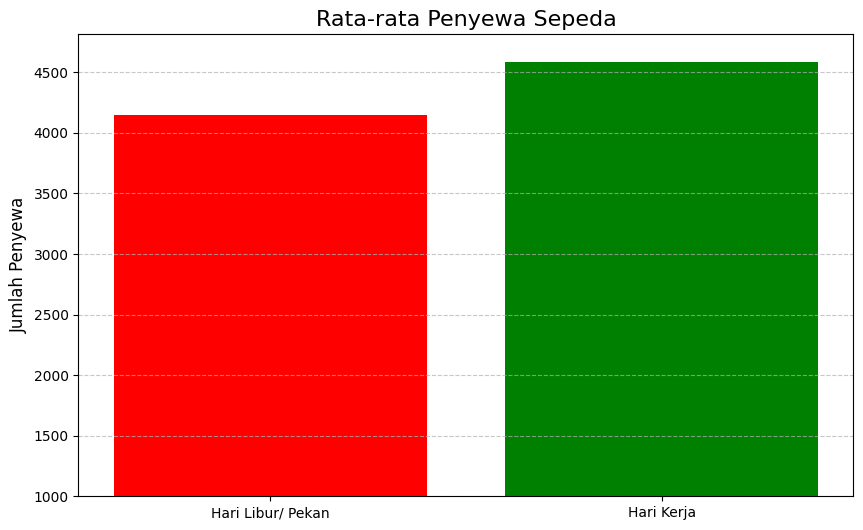

In [21]:
holiday = day[(day['holiday'] == 1) | (day['weekday'] == 0)]
harikerja = day[day['workingday'] == 1]

# Statistik ANOVA
f_statistic, p_value = stats.f_oneway(holiday['cnt'], harikerja['cnt'])
if p_value < 0.05:
    print('Terdapat perbedaan signifikan antara jumlah penyewa di hari libur/pekan dengan jumlah penyewa di hari kerja')
else:
    print('Tak ada perbedaan yang signifikan antara jumlah penyewa di hari libur/pekan dengan jumlah penyewa di hari kerja')

# Menghitung rata-rata
holiday_mean = holiday['cnt'].mean()
harikerja_mean = harikerja['cnt'].mean()

# Membuat DataFrame baru untuk visualisasi
dict = {
    'Jenis': ['Hari Libur/ Pekan', 'Hari Kerja'],
    'Rata-rata Penyewa': [holiday_mean, harikerja_mean]
}
new_df = pd.DataFrame(dict)

# Membuat bar chart
plt.figure(figsize=(10, 6))
colors = ['red', 'green']  # Warna untuk diagram
plt.bar(new_df['Jenis'], new_df['Rata-rata Penyewa'], color=colors)

# Menambahkan judul dan pengaturan lainnya
plt.title('Rata-rata Penyewa Sepeda', fontsize=16)
plt.ylabel('Jumlah Penyewa', fontsize=12)
plt.ylim(1000)  # Menyesuaikan limit y-axis
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

4. Bagaimana pengaruh musim terhadap tingkat penyewaan sepeda? Musim apa yang mencatatkan jumlah pengguna sepeda terbanyak?

In [22]:
# Menguji Statistik

# Menggunakan korelasi Pearson untuk mengevaluasi hubungan antara musim dengan jumlah penyewa sepeda
corr_pearson, p_value = stats.pearsonr(day['season'], day['cnt'])
if p_value < 0.05:
    print("Terdapat hubungan yang cukup kuat antara musim dengan jumlah penyewa sepeda.")
else:
    print("Tidak ditemukan hubungan yang signifikan antara musim dengan jumlah penyewa sepeda.")

# Menggunakan uji ANOVA untuk menguji perbedaan jumlah penyewa sepeda di empat musim
musim_1 = day[day['season'] == 1]['cnt']
musim_2 = day[day['season'] == 2]['cnt']
musim_3 = day[day['season'] == 3]['cnt']
musim_4 = day[day['season'] == 4]['cnt']

f_statistic, p_value = stats.f_oneway(musim_1, musim_2, musim_3, musim_4)
if p_value < 0.05:
    print("Hasil uji ANOVA menunjukkan bahwa terdapat perbedaan jumlah penyewa sepeda di antara empat musim.")
else:
    print("Tidak ditemukan perbedaan signifikan jumlah penyewa sepeda di antara empat musim.")

# Karena nilai p-value < 0.05, dilakukan uji post-hoc untuk mengetahui musim mana yang memiliki perbedaan signifikan
hasil_tukey = pairwise_tukeyhsd(endog=day['cnt'], groups=day['season'], alpha=0.05)
print(hasil_tukey.summary())


Terdapat hubungan yang cukup kuat antara musim dengan jumlah penyewa sepeda.
Hasil uji ANOVA menunjukkan bahwa terdapat perbedaan jumlah penyewa sepeda di antara empat musim.
   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2  meandiff p-adj    lower     upper   reject
---------------------------------------------------------
     1      2 2388.1989    0.0 1965.3325 2811.0653   True
     1      3 3040.1706    0.0 2619.5409 3460.8003   True
     1      4 2124.0303    0.0 1697.6444 2550.4163   True
     2      3  651.9717 0.0004  233.0927 1070.8507   True
     2      4 -264.1686 0.3782 -688.8276  160.4904  False
     3      4 -916.1403    0.0 -1338.572 -493.7085   True
---------------------------------------------------------


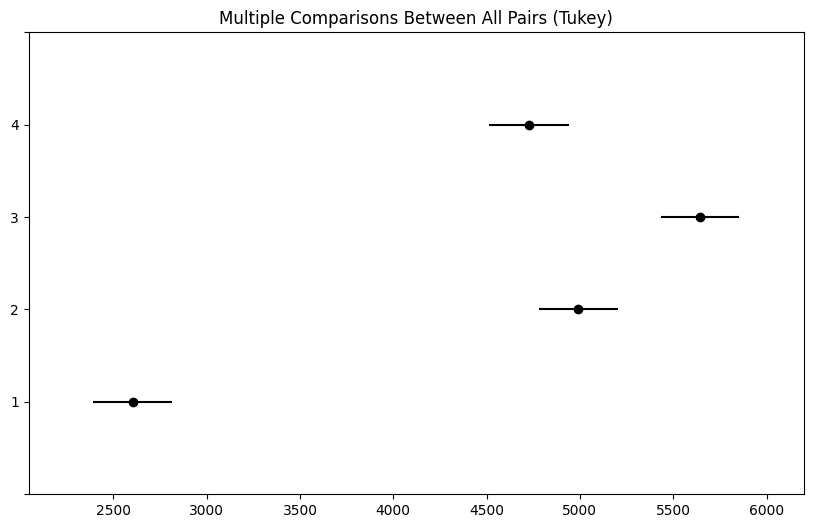

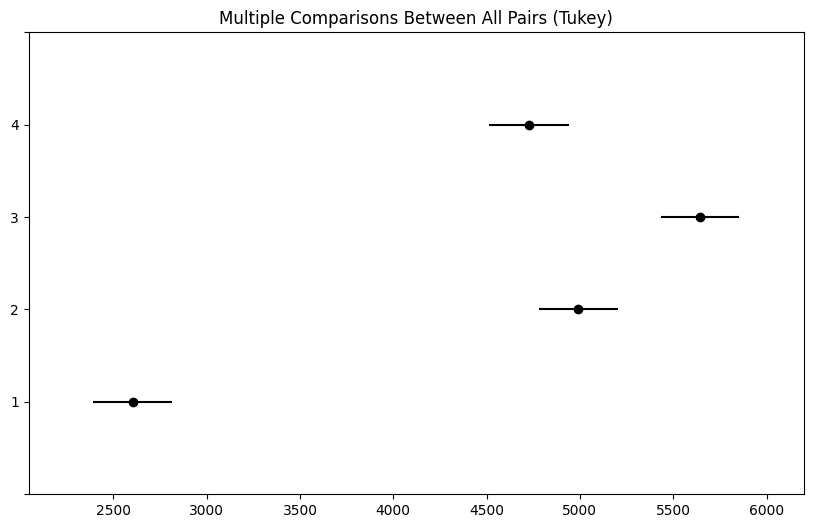

In [23]:
# Menampilkan visualisasi hasil uji Tukey dalam bentuk plot
hasil_tukey.plot_simultaneous()

**Insight:**

Berdasarkan Tukey Plot di atas, terlihat bahwa musim yang saling berdekatan secara vertikal menunjukkan bahwa tidak ada perbedaan jumlah pengunjung yang signifikan antara kedua musim tersebut. Sebaliknya, musim yang tidak berdekatan atau memiliki jarak vertikal yang jelas menunjukkan adanya perbedaan jumlah pengunjung yang signifikan di antara musim-musim tersebut.

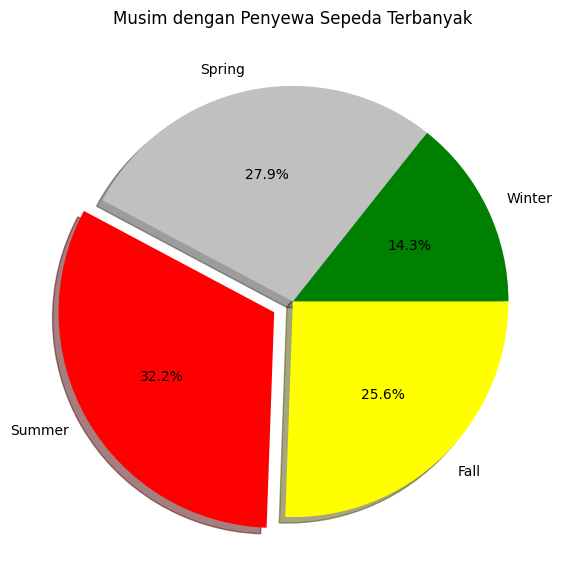

In [24]:
# Menghitung jumlah penyewa sepeda berdasarkan musim
biggest_season = day.groupby('season')['cnt'].sum().reset_index()
biggest_season

# Membuat diagram pai dengan warna yang ditentukan
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10, 7))
colors = ['green', 'silver', 'red', 'yellow']  # Warna untuk setiap musim
ax.pie(
    biggest_season['cnt'],
    autopct='%1.1f%%',
    labels=['Winter', 'Spring', 'Summer', 'Fall'],
    shadow=True,
    explode=(0, 0, 0.1, 0),  # Membuat "Summer" sedikit terpisah
    colors=colors  # Menambahkan warna
)
ax.set_title('Musim dengan Penyewa Sepeda Terbanyak')
plt.show()

<h4> <strong>Kesimpulan

Pertanyaan 1:

Berdasarkan diagram batang di atas, berikut adalah kesimpulan yang dapat diambil:

1. **Bulan dengan Penyewa Terendah**: Bulan 1 memiliki jumlah penyewa sepeda paling rendah dibandingkan bulan lainnya.
2. **Bulan dengan Penyewa Tertinggi**: Bulan 8 memiliki jumlah penyewa sepeda paling tinggi.
3. **Polanya**: Jumlah penyewa sepeda cenderung meningkat dari awal tahun (Januari) hingga mencapai puncaknya di musim panas (Agustus). Setelah itu, jumlah penyewa kembali menurun hingga akhir tahun (Desember).
4. **Musiman**: Hal ini menunjukkan bahwa penggunaan sepeda mungkin dipengaruhi oleh kondisi musim atau cuaca, dengan puncak penggunaan terjadi di musim panas, ketika cuaca lebih hangat dan lebih kondusif untuk bersepeda.

Pertanyaan 2:

Setiap tahun, jumlah penyewa sepeda menunjukkan tren peningkatan yang konsisten. Hal ini mengindikasikan bahwa bisnis penyewaan sepeda mengalami pertumbuhan yang positif. Pertumbuhan ini bisa disebabkan oleh beberapa faktor, seperti meningkatnya kesadaran masyarakat akan gaya hidup sehat, popularitas bersepeda sebagai aktivitas rekreasi, atau peningkatan infrastruktur pendukung seperti jalur khusus sepeda. Dengan tren ini, bisnis penyewaan sepeda memiliki peluang besar untuk terus berkembang di masa depan.

Pertanyaan 3:

Hari libur atau akhir pekan memiliki dampak yang signifikan terhadap jumlah penyewaan sepeda dibandingkan dengan hari kerja. Meskipun hari libur dan akhir pekan cenderung memberikan waktu luang bagi banyak orang untuk melakukan aktivitas rekreasi, data menunjukkan bahwa rata-rata jumlah penyewa sepeda pada hari libur atau akhir pekan justru lebih rendah dibandingkan dengan hari kerja.

Hal ini mungkin disebabkan oleh beberapa faktor, seperti perbedaan pola aktivitas masyarakat. Pada hari kerja, sepeda mungkin lebih sering digunakan sebagai alat transportasi harian untuk bekerja atau sekolah, sementara pada hari libur, penggunaannya lebih terbatas pada keperluan rekreasi atau olahraga.

Pertanyaan 4:

Musim memiliki pengaruh yang signifikan terhadap jumlah penyewa sepeda. Setiap musim menunjukkan perbedaan jumlah penyewa sepeda yang cukup jelas, kecuali antara musim 2 (musim semi) dan musim 4 (musim gugur), di mana jumlah penyewanya relatif sama dan tidak memiliki perbedaan yang signifikan.

Musim panas menjadi periode dengan jumlah penyewa sepeda tertinggi, mencapai persentase sebesar 32%. Hal ini dapat disebabkan oleh cuaca yang lebih hangat dan cerah, yang membuat kondisi lebih ideal untuk bersepeda, baik untuk rekreasi maupun transportasi. Musim panas juga biasanya menjadi waktu liburan bagi banyak orang, sehingga aktivitas luar ruangan seperti bersepeda menjadi lebih populer.